In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.cross_validation import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = load_iris()
X, y = iris.data, iris.target
to_delete = np.where(y == 2)[0] # Get list of indexes where y = 2

#Get modified X, y to make this a binary classification problem
y_mod= np.delete(y,to_delete) 
X_mod = np.delete(X,to_delete,0)
y_mod[y_mod == 0] = -1 #code class 0 as -1 



In [31]:
def batch_perceptron(train_X, train_y, max_iter):
    '''
    Obtained from Sec 9.1.2 of textbook.
    The batch perceptron algorithm takes as input the training set 
    and the maximum number of iterations.
    The learning parameter (w) is initialized to zero. 
    '''
    
    d = X.shape[1]
    w = np.zeros(d)
    error = []
    
    for t in range(max_iter):
        num_error = 0
        
        for X_i, y_i in zip(train_X, train_y):
            if (y_i * np.sign(np.dot(w,X_i)) <= 0):
                num_error += 1
                w += y_i*X_i
                
       
        error.append(num_error)
    return w, error
    


In [32]:
def modif_perceptron(train_X, train_y, max_iter, n):
    '''
    Obtained from Exercise 9.6.5 of textbook.
    The modified batch perceptron algorithm takes as input the training set,
    the maximum number of iterations and the parameter n.
    The learning parameter (w) is initialized to zero. 
    '''
    d = X.shape[1]
    w = [0]* d
    error = []
    
    for t in range(max_iter):
        num_error = 0
        
        for X_i, y_i in zip(train_X, train_y):
            
            if y_i * np.sign(np.dot(w,X_i)) <= 0:
                num_error += 1
                w += n*y_i*X_i
                
        
        error.append(num_error)
    return w, error
    

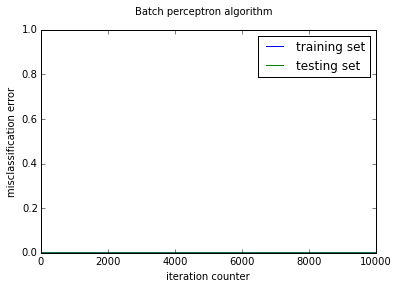

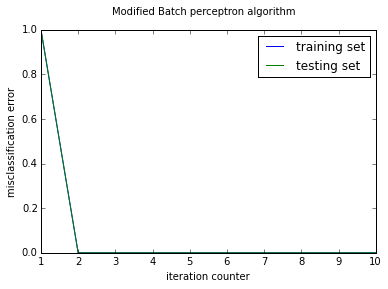

"\nSection 2 -\nThe plot of misclassification error over iteration counter for the training set looks like a \nstraight line along the x axis. In the last iterations, the misclassification error is 0.\nIf the number of iterations is changed to 10, we observe that the misclassification error is 1 at the first\niteration (i.e. when w = [0 0 0 0]) and 0 at the second iteration. It remains 0 for the remaining trials.\n\nAs before, The plot of misclassification error over iteration counter for the testing set looks \nlike a straight line along the x axis.\nIt is exactly the same as the graph for training set.\n\nIt is not necessary to run the algorithm 10000 times since w is not modified at all after the first trial (in this case)\nIf we stopped the algorithm earlier, it would provide us with the same value of w that it does after 10000 trials\n\nSection 3-\nWhen n = 1, the modified batch perceptron algorithm is just the batch algorithm from the previous section. \nChanging the value of n d

In [55]:
np.random.seed(12162015) #set seed
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X_mod))

X_mod, y_mod = X_mod[permutation], y_mod[permutation]

#Scaling features between (-1,1)
minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1)) 
X_mod = minmax_scale.fit_transform(X_mod) 

#Splitting data into training set and testing set
train_X, test_X, train_y, test_y = train_test_split(X_mod, y_mod, train_size=0.5, random_state=1999)


w_train, error_train = batch_perceptron(train_X, train_y, 10000)
w_test, error_test = batch_perceptron(test_X, test_y, 10000)

plt.figure(1)
plt.plot( range(1, len(error_train)+1), error_train, label = 'training set')
plt.plot(range(1, len(error_test)+1 ), error_test, label = 'testing set')
plt.xlabel('iteration counter')
plt.ylabel('misclassification error')
plt.legend(loc = 'upper right')
plt.suptitle("Batch perceptron algorithm")

#modified batch perceptron
w_train2, error_train2 = modif_perceptron(train_X, train_y, 10,1)
w_test2, error_test2 = modif_perceptron(test_X, test_y, 10,1)

plt.figure(2)
plt.plot( range(1, len(error_train2)+1), error_train2, label = 'training set')
plt.plot(range(1, len(error_test2)+1 ), error_test2, label = 'testing set')
plt.xlabel('iteration counter')
plt.ylabel('misclassification error')
plt.legend(loc = 'upper right')
plt.suptitle("Modified Batch perceptron algorithm")

plt.show()

'''
Section 2 -
The plot of misclassification error over iteration counter for the training set looks like a 
straight line along the x axis. In the last iterations, the misclassification error is 0.
If the number of iterations is changed to 10, we observe that the misclassification error is 1 at the first
iteration (i.e. when w = [0 0 0 0]) and 0 at the second iteration. It remains 0 for the remaining trials.

As before, The plot of misclassification error over iteration counter for the testing set looks 
like a straight line along the x axis.
It is exactly the same as the graph for training set.

It is not necessary to run the algorithm 10000 times since w is not modified at all after the first trial (in this case)
If we stopped the algorithm earlier, it would provide us with the same value of w that it does after 10000 trials

Section 3-
When n = 1, the modified batch perceptron algorithm is just the batch algorithm from the previous section. 
Changing the value of n does not seem to make a difference. 
Theoretically, when we think about it, if n is too small, the number of iterations taken to get the required value
of w will be longer. If n is too high, we might adjust the value of w by too much and overshoot our target and keep 
swinging around.
In the graph however, there appears to be no difference when the value of n changes.

Section 4-

1) It took me about 3 hours to complete this assignment
2) The python programming wasn't particularly difficult. I spent a long time thinking that my 
algorithm didn't work because the value of w stayed the same after the first iteration. That took an additional 2 hours.
3) None yet.


Extra-

I tried running the same algorithm on the faces data by changing the first couple of lines of code to the following-

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X, y = faces.data, faces.target


to_delete = np.where(np.logical_and(y != 0,y!= 1))[0] # Get list of indexes where y != 0 and y! = 1

#Get modified X, y to make this a binary classification problem
y_mod= np.delete(y,to_delete) 
X_mod = np.delete(X,to_delete,0)
y_mod[y_mod == 0] = -1 #code class 0 as -1 

However, since I had to make this a binary classification problem, I had to remove a lot of the data samples and I was
left with a dataset of size 20.
The graphs that I obtained were the same as those obtained for the iris dataset. The value of w was constant after
the first iteration.
'''
